# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** M. Zidan Richal Fajril Falah
- **Email:** richalfajril@gmail.com
- **ID Dicoding:** richalfajril

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
- Pertanyaan 2

## Import Semua Packages/Library yang Digunakan

In [234]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel 5 data teratas dari data day.csv sebagai berikut:

In [235]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat tabel 5 data teratas dari data hour.csv sebagai berikut:

In [236]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

**KARAKTERISTIK DATA**

Baik hour.csv maupun day.csv memiliki kolom-kolom berikut, kecuali hr yang tidak tersedia di day.csv

- **instant:** indeks rekaman
- **dteday:** tanggal
- **season:** musim (1: semi, 2: panas, 3: gugur, 4: dingin)
- **yr:** tahun (0: 2011, 1: 2012)
- **mnth:** bulan (1 hingga 12)
- **hr:** jam (0 hingga 23)
- **holiday:** apakah hari tersebut adalah hari libur atau tidak
- **weekday:** hari dalam seminggu
- **workingday:** jika hari tersebut bukan akhir pekan maupun hari libur adalah 1, jika tidak 0.
- **weathersit:**
    - 1: Jelas, Beberapa awan, Sebagian berawan
    - 2: Kabut + Berawan, Kabut + Awan terputus, Kabut + Beberapa awan, Kabut
    - 3: Salju ringan, Hujan ringan + Badai petir + Awan tersebar, Hujan ringan + Awan tersebar
    - 4: Hujan deras + Peluru es + Badai petir + Kabut, Salju + Kabut
- **temp:** Suhu yang dinormalisasi dalam Celsius. Nilai dibagi 41 (maks)
- **atemp:** Suhu yang dirasakan yang dinormalisasi dalam Celsius. Nilai dibagi 50 (maks)
- **hum:** Kelembapan yang dinormalisasi. Nilai dibagi 100 (maks)
- **windspeed:** Kecepatan angin yang dinormalisasi. Nilai dibagi 67 (maks)
- **casual:** jumlah pengguna kasual
- **registered:** jumlah pengguna terdaftar
- **cnt:** jumlah total sepeda sewa termasuk kasual dan terdaftar

Sumber: readme.txt dalam zip dataset

### Assessing Data

Menilai data day.csv

- Memeriksa tipe data dari tiap kolom:

In [237]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


> Seharusnya 'dteday' memiliki tipe data datetime bukan object, dan beberapa kolom perlu diganti tipe datanya menjadi categories

- Memeriksa missing value:

In [238]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

> Jika diperhatikan, jumlah data pada day_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya

- Memeriksa duplikasi dan menampilkan ringkasan parameter statistik:

In [239]:
print("Jumlah duplikasi", day_df.duplicated().sum())

day_df.describe(include="all")

Jumlah duplikasi 0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


> Jika diperhatikan, tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada day_df. 

Menilai data hour.csv

- Memeriksa tipe data dari tiap kolom:

In [240]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


> Seharusnya 'dteday' memiliki tipe data datetime bukan object, dan beberapa kolom perlu diganti tipe datanya menjadi categories

- Memeriksa missing value:

In [241]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

> Tidak terdapat *missing value* dalam data hour.csv

- Memeriksa duplikasi dan menampilkan ringkasan parameter statistik:

In [242]:
print("Jumlah duplikasi", hour_df.duplicated().sum())

hour_df.describe(include="all")

Jumlah duplikasi 0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


> Jika diperhatikan, tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada hour_df. 

**Insight:**
- Beberapa kolom, seperti dteday, perlu diubah tipe datanya dari object ke tipe yang lebih sesuai, yaitu datetime. Selain itu, beberapa kolom lain sebaiknya dikonversi ke tipe category untuk efisiensi dan kemudahan analisis.
- Tidak ada missing value dalam kedua dataset (day_df dan hour_df), menunjukkan data sudah lengkap dan siap dianalisis tanpa perlu penanganan khusus untuk nilai yang hilang.
- Tidak ada data duplikat atau anomali yang ditemukan dalam kedua dataset, menunjukkan bahwa data bersih dan konsisten

### Cleaning Data

Mengubah tipe data pada kolom "dteday" day.csv dan hour.csv menjadi tipe data datetime:

In [243]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Memeriksa kembali apakah tipe data dteday pada day.csv dan hour.csv sudah terganti:

In [244]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [245]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Mengubah nama kolom agar memperjelas data dan menampilkan hasil perubahan kolom data day.csv:

In [246]:
day_df.rename(columns={
    "instant": "no",
    "dteday": "tanggal",
    "season": "musim",
    "yr": "tahun",
    "mnth": "bulan",
    "holiday": "hari_libur",
    "weekday": "hari",
    "workingday": "hari_kerja",
    "weathersit": "cuaca",
    "temp": "suhu",
    "atemp": "suhu_subjek",
    "hum": "kelembapan",
    "windspeed": "kecepatan_angin",
    "casual": "kasual",
    "registered": "terdaftar",
    "cnt": "total"
}, inplace=True)

#Menampilkan 5 data teratas
day_df.head()

,no,tanggal,musim,tahun,bulan,hari_libur,hari,hari_kerja,cuaca,suhu,suhu_subjek,kelembapan,kecepatan_angin,kasual,terdaftar,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah nama kolom agar memperjelas data dan menampilkan hasil perubahan kolom data hour.csv:

In [247]:
hour_df.rename(columns={
    "instant": "no",
    "dteday": "tanggal",
    "season": "musim",
    "yr": "tahun",
    "mnth": "bulan",
    "holiday": "hari_libur",
    "hr": "jam",
    "weekday": "hari",
    "workingday": "hari_kerja",
    "weathersit": "cuaca",
    "temp": "suhu",
    "atemp": "suhu_subjek",
    "hum": "kelembapan",
    "windspeed": "kecepatan_angin",
    "casual": "kasual",
    "registered": "terdaftar",
    "cnt": "total"
}, inplace=True)

#Menampilkan 5 data teratas
hour_df.head()

,no,tanggal,musim,tahun,bulan,jam,hari_libur,hari,hari_kerja,cuaca,suhu,suhu_subjek,kelembapan,kecepatan_angin,kasual,terdaftar,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah tipe data menjadi "category" pada beberapa kolom yang relevan dalam day.csv dan hour.csv agar data mudah dibaca dan dipahami:

In [248]:
#Fungsi mengubah tipe data menjadi category
categories = ['musim', 'bulan', 'hari', 'cuaca']

for category in categories:
    day_df[category] = day_df[category].astype('category')
    hour_df[category] = hour_df[category].astype('category')

Cek lagi apakah tipe data sudah terganti

In [249]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   no               731 non-null    int64         
 1   tanggal          731 non-null    datetime64[ns]
 2   musim            731 non-null    category      
 3   tahun            731 non-null    int64         
 4   bulan            731 non-null    category      
 5   hari_libur       731 non-null    int64         
 6   hari             731 non-null    category      
 7   hari_kerja       731 non-null    int64         
 8   cuaca            731 non-null    category      
 9   suhu             731 non-null    float64       
 10  suhu_subjek      731 non-null    float64       
 11  kelembapan       731 non-null    float64       
 12  kecepatan_angin  731 non-null    float64       
 13  kasual           731 non-null    int64         
 14  terdaftar        731 non-null    int64    

In [250]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   no               17379 non-null  int64         
 1   tanggal          17379 non-null  datetime64[ns]
 2   musim            17379 non-null  category      
 3   tahun            17379 non-null  int64         
 4   bulan            17379 non-null  category      
 5   jam              17379 non-null  int64         
 6   hari_libur       17379 non-null  int64         
 7   hari             17379 non-null  category      
 8   hari_kerja       17379 non-null  int64         
 9   cuaca            17379 non-null  category      
 10  suhu             17379 non-null  float64       
 11  suhu_subjek      17379 non-null  float64       
 12  kelembapan       17379 non-null  float64       
 13  kecepatan_angin  17379 non-null  float64       
 14  kasual           17379 non-null  int64

Melakukan konversi atau penggantian kategori pada kolom 'musim', 'bulan', 'hari', 'cuaca' di dataframe day_df dan hour_df menggunakan kategori baru

In [251]:
#Fungsi konversi
def konversi (df, col_and_ctg):
    for col, ctg in col_and_ctg.items():
        df[col] = df[col].cat.rename_categories(ctg)
    return df

In [252]:
#Konversi musim
season_dict = {
    'musim':{
        1:'Semi',
        2:'Panas',
        3:'Gugur',
        4:'Dingin'
    }
}

day_df = konversi(day_df, season_dict)
hour_df = konversi(hour_df, season_dict)

In [253]:
#Konversi bulan
month_dict = {
    'bulan':{
        1: 'Januari',
        2: 'Februari',
        3: 'Maret',
        4: 'April',
        5: 'Mei',
        6: 'Juni',
        7: 'Juli',
        8: 'Agustus',
        9: 'September',
        10: 'Oktober',
        11: 'November',
        12: 'Desember'
    }
}

day_df = konversi(day_df, month_dict)
hour_df = konversi(hour_df, month_dict)

In [254]:
#Konversi hari
day_dict = {
    'hari':{
        0: 'Minggu',
        1: 'Senin',
        2: 'Selasa',
        3: 'Rabu',
        4: 'Kamis',
        5: 'Jumat',
        6: 'Sabtu'
    }
}

day_df = konversi(day_df, day_dict)
hour_df = konversi(hour_df, day_dict)

In [255]:
#Konversi Cuaca
weather_dict = {
    'cuaca':{
        1: 'Cerah',
        2: 'Berkabut',
        3: 'Hujan/Salju Ringan',
        4: 'Hujan/Salju Lebat'
    }
}

day_df = konversi(day_df, weather_dict)
hour_df = konversi(hour_df, weather_dict)

Konversi tahun agar data mudah dibaca

In [256]:
year_mapping = {
    0: '2011',
    1: '2012'
}

day_df['tahun'] = day_df['tahun'].map(year_mapping)
hour_df['tahun'] = hour_df['tahun'].map(year_mapping)

Mengembalikan nilai 'suhu', 'suhu_subjek, 'kelembapan', dan 'kecepatan_angin' ke nilai aslinya:

In [257]:
def return_value(df):
    df['suhu'] = (df['suhu'] * 41).round().astype(int)
    df['suhu_subjek'] = (df['suhu_subjek'] * 50).round().astype(int)
    df['kelembapan'] = (df['kelembapan'] * 100).round().astype(int)
    df['kecepatan_angin'] = (df['kecepatan_angin'] * 67).round().astype(int)
    return df


hour_df = return_value(hour_df)
day_df = return_value(day_df)

Mengubah format pada kolom 'jam' menjadi format (00:00) 24 jam

In [258]:
hour_df['jam'] = hour_df['jam'].apply(lambda x: '{:02d}:00'.format(x))

Menampilkan 5 data teratas untuk memeriksa hasil beberapa konversi yang dilakukan

In [259]:
day_df.head()

,no,tanggal,musim,tahun,bulan,hari_libur,hari,hari_kerja,cuaca,suhu,suhu_subjek,kelembapan,kecepatan_angin,kasual,terdaftar,total
0,1,2011-01-01,Semi,2011,Januari,0,Sabtu,0,Berkabut,14,18,81,11,331,654,985
1,2,2011-01-02,Semi,2011,Januari,0,Minggu,0,Berkabut,15,18,70,17,131,670,801
2,3,2011-01-03,Semi,2011,Januari,0,Senin,1,Cerah,8,9,44,17,120,1229,1349
3,4,2011-01-04,Semi,2011,Januari,0,Selasa,1,Cerah,8,11,59,11,108,1454,1562
4,5,2011-01-05,Semi,2011,Januari,0,Rabu,1,Cerah,9,11,44,13,82,1518,1600


In [260]:
hour_df.head()

,no,tanggal,musim,tahun,bulan,jam,hari_libur,hari,hari_kerja,cuaca,suhu,suhu_subjek,kelembapan,kecepatan_angin,kasual,terdaftar,total
0,1,2011-01-01,Semi,2011,Januari,00:00,0,Sabtu,0,Cerah,10,14,81,0,3,13,16
1,2,2011-01-01,Semi,2011,Januari,01:00,0,Sabtu,0,Cerah,9,14,80,0,8,32,40
2,3,2011-01-01,Semi,2011,Januari,02:00,0,Sabtu,0,Cerah,9,14,80,0,5,27,32
3,4,2011-01-01,Semi,2011,Januari,03:00,0,Sabtu,0,Cerah,10,14,75,0,3,10,13
4,5,2011-01-01,Semi,2011,Januari,04:00,0,Sabtu,0,Cerah,10,14,75,0,0,1,1


Mari kita coba dengan memunculkan 10 data sampel acak untuk memeriksa lagi apakah data sudah bersih...

In [261]:
day_df.sample(10)

,no,tanggal,musim,tahun,bulan,hari_libur,hari,hari_kerja,cuaca,suhu,suhu_subjek,kelembapan,kecepatan_angin,kasual,terdaftar,total
49,50,2011-02-19,Semi,2011,Februari,0,Sabtu,0,Cerah,16,20,19,34,532,1103,1635
273,274,2011-10-01,Dingin,2011,Oktober,0,Sabtu,0,Berkabut,17,21,75,20,480,1949,2429
199,200,2011-07-19,Gugur,2011,Juli,0,Selasa,1,Cerah,32,37,65,9,752,3789,4541
265,266,2011-09-23,Dingin,2011,September,0,Jumat,1,Berkabut,25,26,97,5,258,2137,2395
331,332,2011-11-28,Dingin,2011,November,0,Senin,1,Cerah,21,25,74,10,253,3614,3867
289,290,2011-10-17,Dingin,2011,Oktober,0,Senin,1,Cerah,22,26,58,12,713,3857,4570
475,476,2012-04-20,Panas,2012,April,0,Jumat,1,Cerah,22,26,69,10,1340,5950,7290
435,436,2012-03-11,Semi,2012,Maret,0,Minggu,0,Cerah,15,18,48,15,1658,3253,4911
723,724,2012-12-24,Semi,2012,Desember,0,Senin,1,Berkabut,9,13,79,5,174,746,920
692,693,2012-11-23,Dingin,2012,November,0,Jumat,1,Cerah,15,19,57,10,1603,2307,3910


In [262]:
hour_df.sample(10)

,no,tanggal,musim,tahun,bulan,jam,hari_libur,hari,hari_kerja,cuaca,suhu,suhu_subjek,kelembapan,kecepatan_angin,kasual,terdaftar,total
12146,12147,2012-05-26,Panas,2012,Mei,07:00,0,Sabtu,0,Berkabut,25,28,88,11,10,44,54
939,940,2011-02-11,Semi,2011,Februari,18:00,0,Jumat,1,Cerah,11,16,28,0,9,165,174
14665,14666,2012-09-08,Gugur,2012,September,06:00,0,Sabtu,0,Berkabut,27,30,89,19,8,26,34
3401,3402,2011-05-26,Panas,2011,Mei,15:00,0,Kamis,1,Berkabut,34,38,46,19,40,101,141
10721,10722,2012-03-27,Panas,2012,Maret,20:00,0,Selasa,1,Cerah,17,21,17,6,28,266,294
9368,9369,2012-01-31,Semi,2012,Januari,06:00,0,Selasa,1,Cerah,11,14,52,11,0,104,104
3674,3675,2011-06-07,Panas,2011,Juni,00:00,0,Selasa,1,Cerah,26,30,65,6,5,15,20
5224,5225,2011-08-10,Gugur,2011,Agustus,14:00,0,Rabu,1,Cerah,34,36,34,22,62,116,178
8446,8447,2011-12-23,Semi,2011,Desember,14:00,0,Jumat,1,Cerah,16,20,54,28,23,177,200
12786,12787,2012-06-21,Gugur,2012,Juni,23:00,0,Kamis,1,Cerah,33,39,59,6,12,134,146


Langkah terakhir kita simpan masing-masing data yang sudah dibersihkan hehehe...

In [361]:
day_df.to_csv('cleaned_day_data.csv', index=False)
hour_df.to_csv('cleaned_hour_data.csv', index=False)

**Insight:**
- Dalam proses pembersihan data, beberapa langkah penting dilakukan untuk meningkatkan kualitas dan keterbacaan data. Pertama, tipe data pada kolom tanggal seperti "dteday" diubah menjadi format datetime untuk kemudahan analisis waktu. Selain itu, kolom-kolom tertentu diubah menjadi tipe kategori untuk menyederhanakan dan memperjelas struktur data.
- Nama kolom juga disesuaikan untuk memperjelas makna, seperti mengubah nama kolom "musim", "bulan", "hari", dan "cuaca" agar lebih deskriptif. Data numerik pada kolom seperti 'suhu', 'kelembapan', dan 'kecepatan angin' dikembalikan ke nilai aslinya agar lebih representatif.
- Format jam juga diubah menjadi format 24-jam (00:00) untuk konsistensi tampilan waktu. Akhirnya, pemeriksaan tambahan dilakukan melalui sampel data acak untuk memastikan bahwa proses pembersihan berjalan dengan baik dan hasilnya siap digunakan dalam analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore day_df dan hour_df

- Pertama kita akan mengeksplorasi data day_df terlebih dahulu

In [264]:
day_df.describe(include='all')

,no,tanggal,musim,tahun,bulan,hari_libur,hari,hari_kerja,cuaca,suhu,suhu_subjek,kelembapan,kecepatan_angin,kasual,terdaftar,total
count,731.000000,731,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Gugur,2012,Januari,NaN,Minggu,NaN,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,20.314637,23.735978,62.792066,12.767442,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,2.000000,4.000000,0.000000,2.000000,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,14.000000,17.000000,52.000000,9.000000,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,20.000000,24.000000,63.000000,12.000000,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,27.000000,30.000000,73.000000,16.000000,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,35.000000,42.000000,97.000000,34.000000,3410.000000,6946.000000,8714.000000


- Perbandingan jumlah pengguna dan rentang suhu

In [467]:
suhu_agg = round(day_df.groupby(
    by=pd.cut(day_df['suhu'], bins=[-10, 0, 10, 20, 30, 40, 50])
, observed=False).agg({
    'kasual': 'sum',
    'terdaftar': 'sum',
    'total': 'sum'
}), 2).reset_index().sort_values(by=[], ascending=False)

suhu_agg.columns = ['Rentang Suhu (°C)', 'Pengguna Kasual', 'Pengguna Terdaftar', 'Total Jumlah Pengguna']
suhu_agg

,Rentang Suhu (°C),Pengguna Kasual,Pengguna Terdaftar,Total Jumlah Pengguna
0,"(-10, 0]",0,0,0
1,"(0, 10]",10638,112703,123341
2,"(10, 20]",175357,951172,1126529
3,"(20, 30]",366585,1341634,1708219
4,"(30, 40]",67437,267153,334590
5,"(40, 50]",0,0,0


- Mengetahui korelasi suhu terhadap total pengguna

In [428]:
correlation = day_df['suhu'].corr(day_df['total'])
if correlation > 0.7:
    print(f"Korelasi positif yang sangat kuat bernilai: {correlation:.2f}")
elif correlation > 0.5:
    print(f"Korelasi positif yang kuat bernilai: {correlation:.2f}")
elif correlation > 0:
    print(f"Korelasi positif yang lemah bernilai: {correlation:.2f}")

Korelasi positif yang kuat bernilai: 0.63


- Mengetahui suhu yang sering dipilih pengguna untuk meminjam sepeda

In [397]:

choose_temp = day_df.groupby('suhu', observed=True)['total'].sum().reset_index()
most_temp = choose_temp.loc[choose_temp['total'].idxmax()]
least_temp = choose_temp.loc[choose_temp['total'].idxmin()]

print("Suhu dengan penyewaan sepeda tertinggi:", most_temp)
print("Suhu dengan penyewaan sepeda terendah:", least_temp)

Suhu dengan penyewaan sepeda tertinggi: suhu         29
total    252318
Name: 26, dtype: int64
Suhu dengan penyewaan sepeda terendah: suhu       2
total    981
Name: 0, dtype: int64


- Perbandingan jumlah pengguna dan kecepatan angin

In [468]:
user_v_windspeed = round(day_df.groupby(by=pd.cut(day_df['kecepatan_angin'], bins=[0, 10, 20, 30, 40]), observed=False).agg({
    'suhu': 'mean',
    'suhu_subjek': 'mean',
    'total': 'sum'
}), 2).reset_index().sort_values(by=[], ascending=False)

user_v_windspeed.columns = ['Rentang Kecepatan Angin (km/h)', 'Rata-rata Suhu (°C)', 'Rata-rata Suhu Subjektif (°C)', 'Total Jumlah Pengguna']
user_v_windspeed

,Rentang Kecepatan Angin (km/h),Rata-rata Suhu (°C),Rata-rata Suhu Subjektif (°C),Total Jumlah Pengguna
0,"(0, 10]",21.62,25.37,1344368
1,"(10, 20]",20.00,23.31,1751531
2,"(20, 30]",16.60,19.28,195145
3,"(30, 40]",16.00,20.00,1635


- Mengetahui korelasi kecepatan angin terhadap pengguna

In [396]:
corr_wind = day_df[['kecepatan_angin', 'total']].corr().iloc[0, 1]
if corr_wind > 0.7:
    print(f"Korelasi positif yang sangat kuat bernilai: {corr_wind:.2f}")
elif corr_wind > 0.5:
    print(f"Korelasi positif yang kuat bernilai: {corr_wind:.2f}")
elif corr_wind < 0:
    print(f"Korelasi positif yang lemah bernilai: {corr_wind:.2f}")

Korelasi positif yang lemah bernilai: -0.24


- Mengetahui variasi jumlah pengguna terhadap tinggi atau rendahnya angin

In [399]:

windspeed = day_df.groupby('kecepatan_angin', observed=True)['total'].sum().reset_index()
most_wspeed = windspeed.loc[windspeed['total'].idxmax()]
least_wspeed = windspeed.loc[windspeed['total'].idxmin()]

print("Kecepatan angin dengan penyewaan sepeda tertinggi:", most_wspeed)
print("Kecepatan angin penyewaan sepeda terendah:", least_wspeed)

Suhu dengan penyewaan sepeda tertinggi: kecepatan_angin        10
total              309801
Name: 8, dtype: int64
Suhu dengan penyewaan sepeda terendah: kecepatan_angin      34
total              1635
Name: 28, dtype: int64


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana suhu mempengaruhi jumlah user? Apakah terdapat batas suhu tertentu yang menunjukkan perubahan signifikan dalam jumlah user?

### Visualisasi korelasi suhu dan total penyewaan

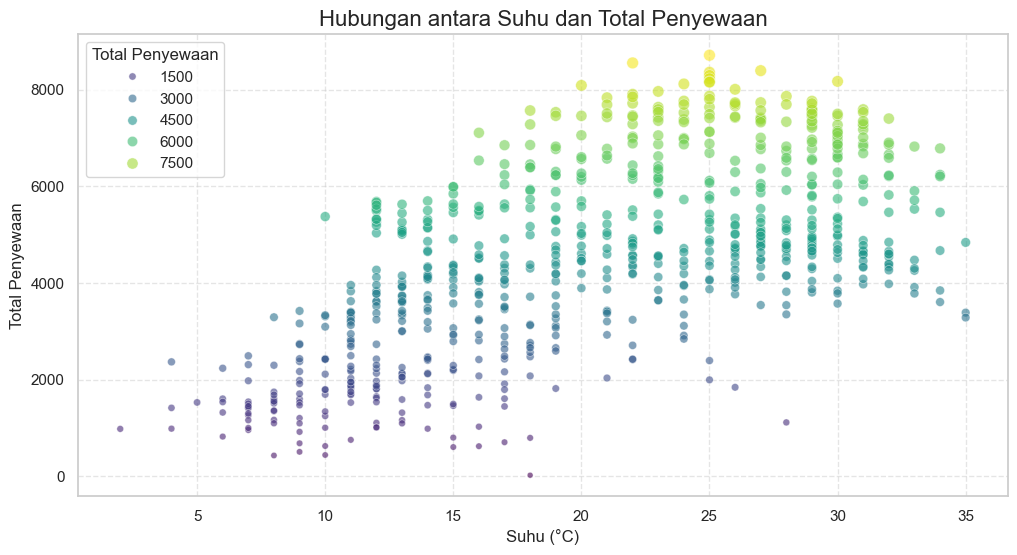

In [457]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=day_df['suhu'], y=day_df['total'], 
                hue='total', 
                size='total', 
                palette='viridis',  
                alpha=0.6,
                data=day_df)  
plt.title('Hubungan antara Suhu dan Total Penyewaan', fontsize=16)
plt.xlabel('Suhu (°C)', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)
plt.legend(title='Total Penyewaan')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Insight Chart 1:**
- Terdapat kecenderungan positif antara suhu dan total penyewaan. Artinya, semakin tinggi suhu, cenderung semakin banyak jumlah sepeda yang disewa. Hal ini mengindikasikan bahwa cuaca yang hangat atau panas mendorong lebih banyak orang untuk menggunakan sepeda.

- Terlihat adanya pengelompokan data pada rentang suhu tertentu, terutama pada suhu yang lebih hangat. Hal ini menunjukkan bahwa pada rentang suhu tertentu, terdapat lonjakan permintaan terhadap penyewaan sepeda.

### Visualisasi perbandingan jumlah pengguna berdasarkan rentang suhu

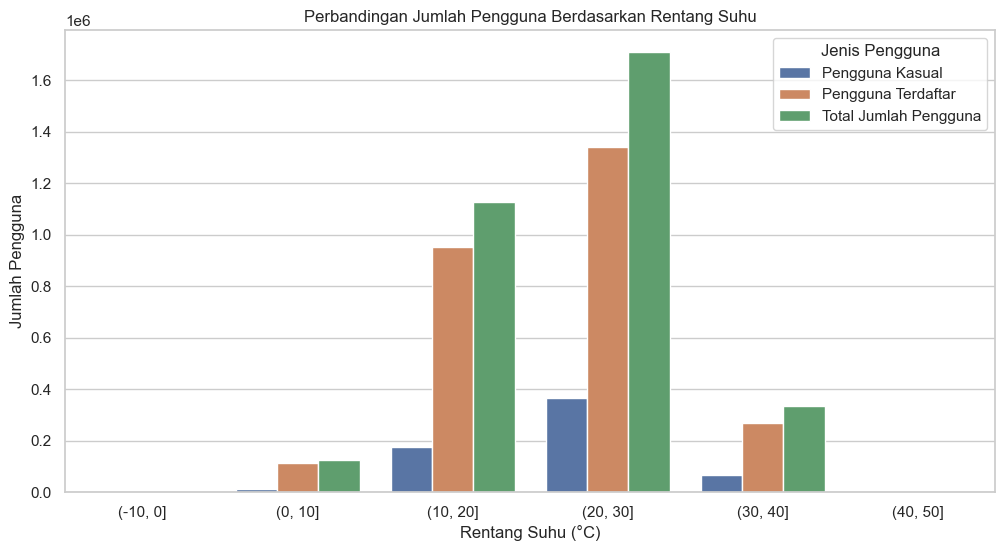

In [415]:
plt.figure(figsize=(12, 6))

sns.barplot(x='Rentang Suhu (°C)', y='value', hue='variable', data=pd.melt(suhu_agg, id_vars=['Rentang Suhu (°C)']))
plt.title('Perbandingan Jumlah Pengguna Berdasarkan Rentang Suhu')
plt.xlabel('Rentang Suhu (°C)')
plt.ylabel('Jumlah Pengguna')
plt.legend(title='Jenis Pengguna')
plt.show()

**Insight Chart 2:**
- Secara umum, jumlah pengguna cenderung meningkat seiring dengan kenaikan suhu, terutama untuk pengguna terdaftar. Hal ini mengindikasikan bahwa suhu yang lebih tinggi mungkin lebih disukai oleh pengguna terdaftar.
- Jumlah pengguna kasual juga cenderung meningkat seiring dengan kenaikan suhu, namun tidak setajam peningkatan pengguna terdaftar. Ini menunjukkan bahwa suhu juga mempengaruhi perilaku pengguna kasual, meskipun tidak sebesar pengaruhnya pada pengguna terdaftar.
- Jumlah pengguna kasual juga cenderung meningkat seiring dengan kenaikan suhu, namun tidak setajam peningkatan pengguna terdaftar. Ini menunjukkan bahwa suhu juga mempengaruhi perilaku pengguna kasual, meskipun tidak sebesar pengaruhnya pada pengguna terdaftar.
- Grafik total pengguna mengikuti tren yang serupa dengan pengguna terdaftar, menunjukkan bahwa pengguna terdaftar memberikan kontribusi yang lebih besar terhadap peningkatan total pengguna.
- Rentang suhu (20, 30) tampaknya menjadi rentang suhu yang optimal untuk menarik dan mempertahankan pengguna, terutama pengguna terdaftar.

### Visualisasi jumlah penyewaan sepeda berdasarkan suhu

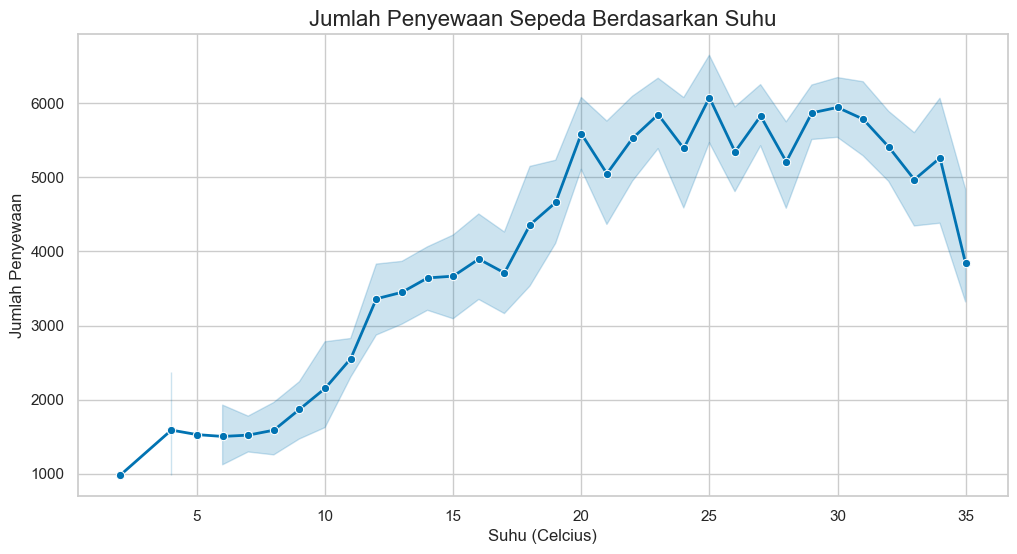

In [420]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")

plt.figure(figsize=(12, 6))

sns.lineplot(x='suhu', y='total', data=day_df, marker='o', linewidth=2)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Suhu', fontsize=16)
plt.xlabel('Suhu (Celcius)', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)


plt.show()

**Insight Chart 3:**
- Secara umum, jumlah penyewaan sepeda cenderung meningkat seiring dengan kenaikan suhu. Ini menunjukkan bahwa cuaca yang lebih hangat mendorong lebih banyak orang untuk menyewa sepeda.
- Terlihat ada rentang suhu tertentu di mana jumlah penyewaan mencapai puncaknya. Pada grafik ini, puncak penyewaan terjadi sekitar suhu 25 derajat Celcius. Ini mengindikasikan bahwa suhu ini dianggap paling nyaman bagi banyak orang untuk bersepeda.
- Meskipun ada tren peningkatan secara keseluruhan, jumlah penyewaan juga mengalami fluktuasi. Ini bisa dipengaruhi oleh faktor lain selain suhu, seperti hari dalam seminggu, musim, atau event khusus.
- Area yang diarsir di sekitar garis menunjukkan interval kepercayaan. Ini memberikan gambaran tentang seberapa yakin kita dengan estimasi jumlah penyewaan pada suhu tertentu. Semakin sempit area shading, semakin akurat estimasi kita.
- Perusahaan dapat menjalankan kampanye promosi yang disesuaikan dengan suhu. Misalnya, menawarkan diskon khusus pada hari-hari yang diperkirakan memiliki suhu yang optimal untuk bersepeda.



### Pertanyaan 2: Apakah kecepatan angin yang lebih tinggi cenderung menghasilkan jumlah user yang lebih rendah atau sebaliknya?

### Visualisasi korelasi kecepatan angin dan total penyewaan

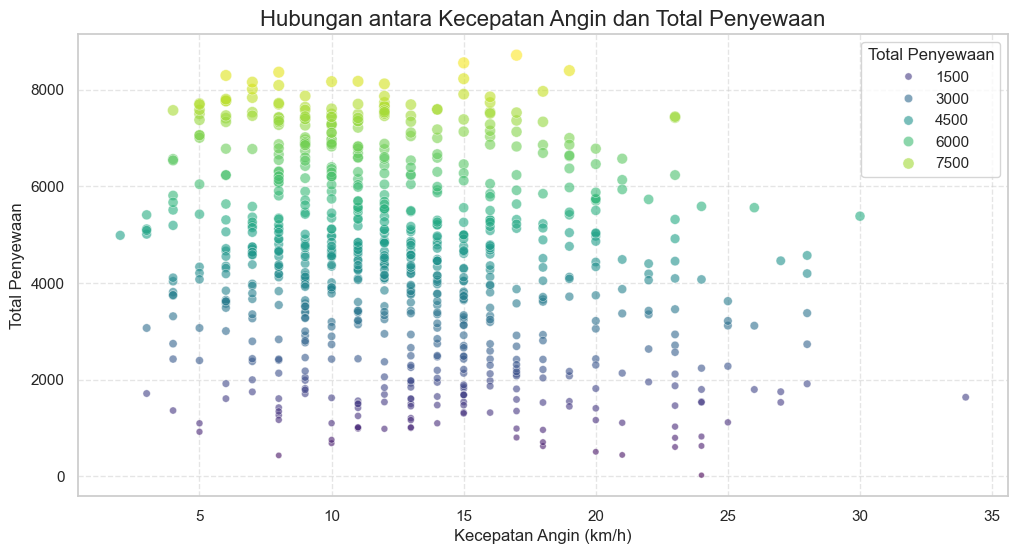

In [431]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(x=day_df['kecepatan_angin'], y=day_df['total'], 
                hue='total',  
                size='total',  
                palette='viridis',  
                alpha=0.6,
                data=day_df)
plt.title('Hubungan antara Kecepatan Angin dan Total Penyewaan', fontsize=16)
plt.xlabel('Kecepatan Angin (km/h)', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)
plt.legend(title='Total Penyewaan')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Insight Chart 1:**
-  Kecepatan angin tampaknya tidak menjadi faktor dominan yang mempengaruhi jumlah penyewaan sepeda dalam dataset ini.
Variasi yang Tinggi: Jumlah penyewaan sepeda sangat bervariasi pada setiap tingkat kecepatan angin, menunjukkan bahwa faktor lain mungkin lebih berpengaruh.
- Jumlah penyewaan sepeda sangat bervariasi pada setiap tingkat kecepatan angin, menunjukkan bahwa faktor lain mungkin lebih berpengaruh.


### Visualisasi perbandingan pengguna dan kecepatan angin

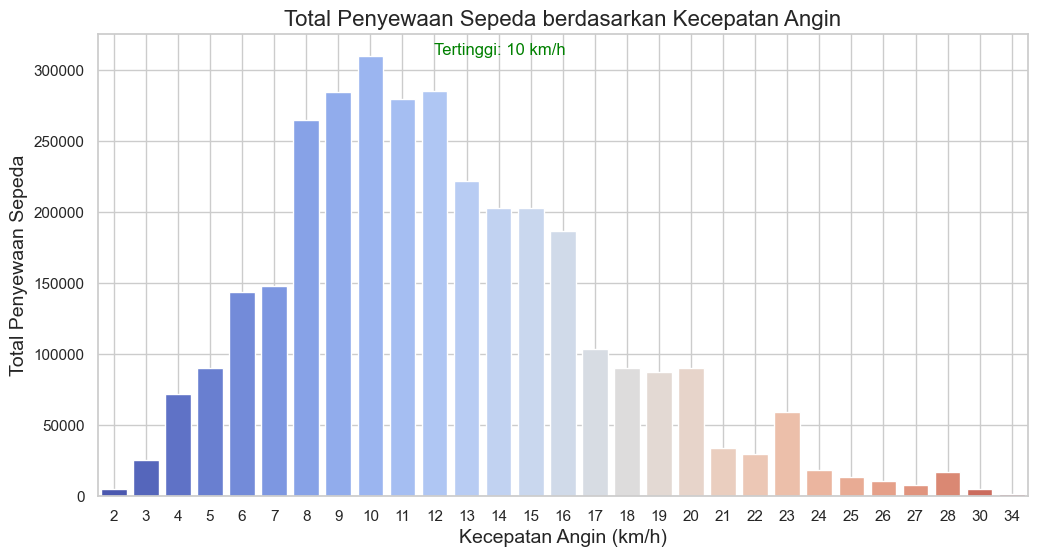

In [461]:
plt.figure(figsize=(12, 6))


sns.barplot(x=windspeed['kecepatan_angin'], 
            y=windspeed['total'], 
            hue=windspeed['kecepatan_angin'],  
            palette='coolwarm',
            legend=False)  

plt.title('Total Penyewaan Sepeda berdasarkan Kecepatan Angin', fontsize=16)
plt.xlabel('Kecepatan Angin (km/h)', fontsize=14)
plt.ylabel('Total Penyewaan Sepeda', fontsize=14)


plt.annotate(f"Tertinggi: {most_wspeed['kecepatan_angin']} km/h", 
            xy=(most_wspeed['kecepatan_angin'], most_wspeed['total']), 
            xytext=(most_wspeed['kecepatan_angin'], most_wspeed['total'] + 1000),
            fontsize=12, color='green')

plt.annotate(f"Terendah: {least_wspeed['kecepatan_angin']} km/h", 
            xy=(least_wspeed['kecepatan_angin'], least_wspeed['total']), 
            xytext=(least_wspeed['kecepatan_angin'], least_wspeed['total'] + 1000),
            arrowprops=dict(facecolor='red', shrink=0.05),
            fontsize=12, color='red')

plt.grid(True)
plt.show()


**Insight Chart 2**
- Jumlah penyewaan sepeda mencapai puncaknya pada kecepatan angin sekitar 10 km/h. Ini menunjukkan bahwa kondisi angin dengan kecepatan sekitar 10 km/h adalah kondisi yang paling ideal bagi banyak orang untuk menyewa sepeda.
- Semakin tinggi kecepatan angin di atas 10 km/h, jumlah penyewaan sepeda cenderung menurun. Ini mengindikasikan bahwa angin yang terlalu kencang dapat mengurangi minat masyarakat untuk menyewa sepeda.
- Pada kecepatan angin yang sangat rendah (di bawah 5 km/h), jumlah penyewaan sepeda juga cenderung lebih sedikit. Ini mungkin karena beberapa faktor, seperti suhu yang terlalu panas atau kondisi cuaca yang tidak mendukung aktivitas di luar ruangan.


## Analisis Lanjutan (Opsional)

### 3. Bagaimana kita dapat mengelompokkan hari dalam seminggu berdasarkan pola penyewaan sepeda dan cuaca untuk mengidentifikasi hari dengan karakteristik serupa?

In [421]:
# Menghitung rata-rata total penyewaan untuk setiap hari dalam seminggu dan kondisi cuaca
weekday_weather_data = day_df.groupby(['hari', 'cuaca'], observed=False)['total'].mean().reset_index()

In [422]:
# Menentukan rentang dan label untuk total penyewaan
total_bins = [0, 3000, 5000, 7000, 9000]
total_labels = ['Sepi', 'Sedang', 'Ramai', 'Sangat Ramai']

# Membuat kategori untuk total penyewaan
weekday_weather_data['cluster'] = pd.cut(weekday_weather_data['total'], bins=total_bins, labels=total_labels, include_lowest=True)

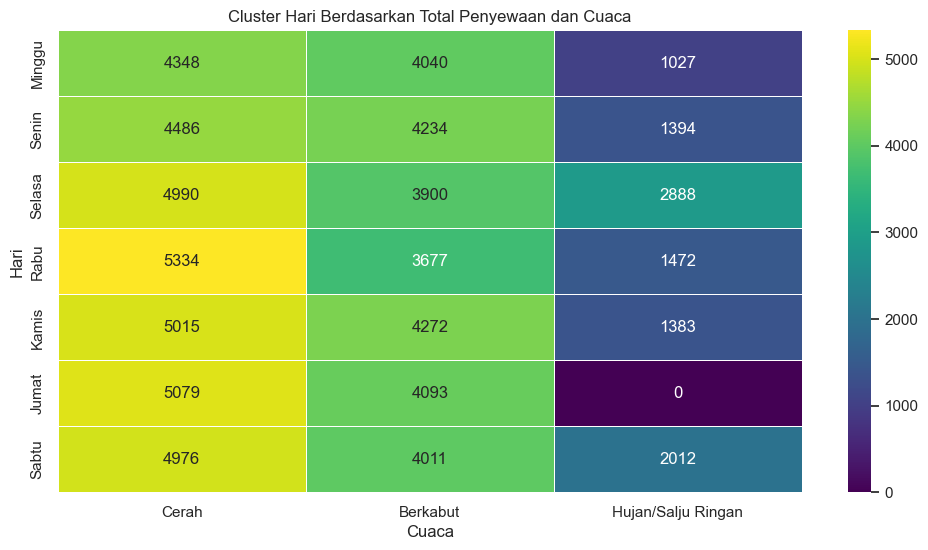

In [424]:
# Membuat heatmap dengan warna berbeda untuk setiap cluster
plt.figure(figsize=(12, 6))
pivot_table = weekday_weather_data.pivot_table(values='total', index='hari', columns='cuaca', aggfunc='sum', observed=False) # Use 'total' which has numeric values for the heatmap
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='.0f', linewidths=.5) # Format the annotations to display whole numbers
plt.title('Cluster Hari Berdasarkan Total Penyewaan dan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Hari')
plt.show()

## Conclusion

- Suhu yang lebih hangat mendorong peningkatan jumlah penyewaan sepeda. Puncak penyewaan terjadi pada suhu sekitar 25 derajat Celcius, menunjukkan bahwa suhu ini paling disukai pengguna. Pengguna terdaftar lebih sensitif terhadap perubahan suhu dibandingkan pengguna kasual. Meskipun demikian, kedua kelompok pengguna menunjukkan peningkatan permintaan saat suhu naik. Faktor lain seperti hari dalam seminggu dan musim juga dapat mempengaruhi jumlah penyewaan.
- Analisis menunjukkan bahwa hubungan antara kecepatan angin dan jumlah penyewaan sepeda tidak sesederhana yang diperkirakan
- Grafik heatmap ini memberikan gambaran yang jelas tentang bagaimana cuaca dan hari dalam seminggu mempengaruhi jumlah penyewaan sepeda. Dengan memahami pola ini, perusahaan penyewaan sepeda dapat mengambil langkah-langkah yang lebih efektif untuk meningkatkan bisnis